<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd #pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np # Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns #Plots
from matplotlib import rcParams #Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans #Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [3]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [4]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [5]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9230994948753956 test Score 0.909736458355348
Estimators =  50 Train Score 0.9258998624079657 test Score 0.9013547931425637
Estimators =  100 Train Score 0.9257343141678821 test Score 0.9180286436394272
Estimators =  250 Train Score 0.9227429554201579 test Score 0.9155753926481114
Estimators =  450 Train Score 0.9237440285579295 test Score 0.9162013527465813


Text(0.5,1,'Estimators vs score at depth of 5')

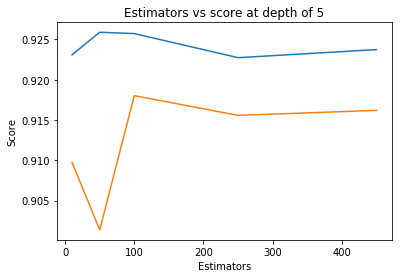

In [6]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8811637240028835 test Score 0.8636988843525533
depth =  9 Train Score 0.9579797650130548 test Score 0.9203353414500569
depth =  11 Train Score 0.9612399947113086 test Score 0.9219634328515223
depth =  15 Train Score 0.964104961482957 test Score 0.9234589725782352
depth =  20 Train Score 0.9645325203252033 test Score 0.9237116874368474
depth =  35 Train Score 0.9644363584619919 test Score 0.923517399633692
depth =  50 Train Score 0.9644363584619919 test Score 0.923517399633692
depth =  70 Train Score 0.9644363584619919 test Score 0.923517399633692
depth =  130 Train Score 0.9644363584619919 test Score 0.923517399633692


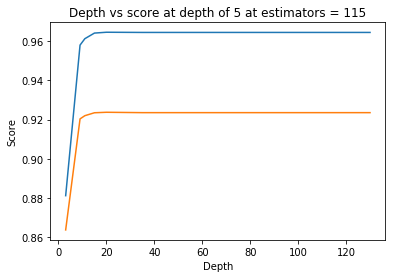

In [7]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [8]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96308152 0.96303068 0.96019942 0.96246273 0.9647149 ]
mean train scores [0.96404632 0.9638157  0.96073767 0.96325016 0.96566718]


In [9]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [10]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [11]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [12]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.966597288176693
Test f1 score 0.9282528193906749


In [13]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


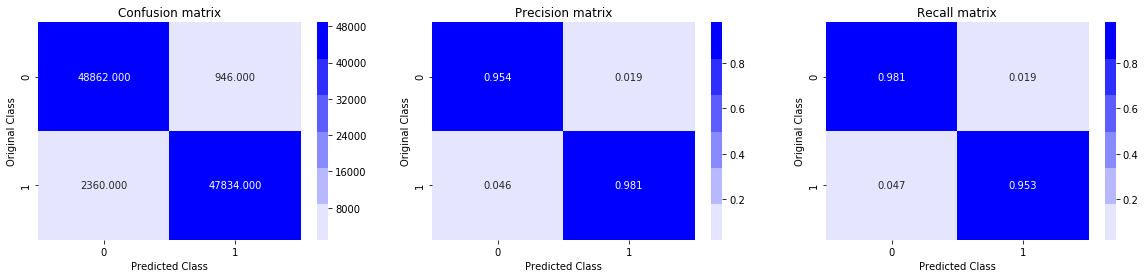

Test confusion_matrix


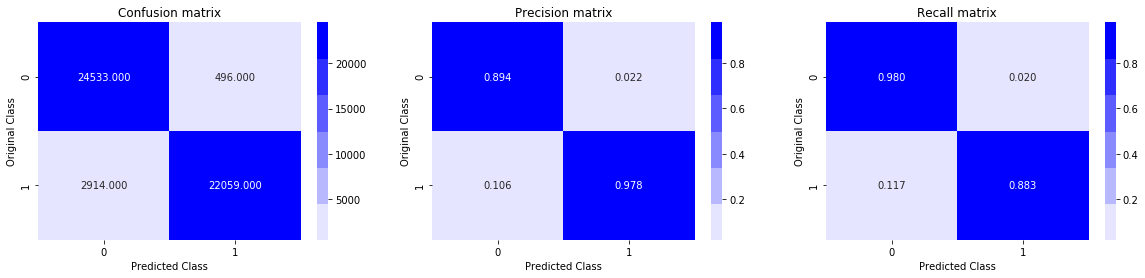

In [14]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

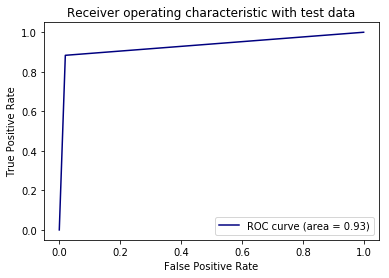

In [15]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

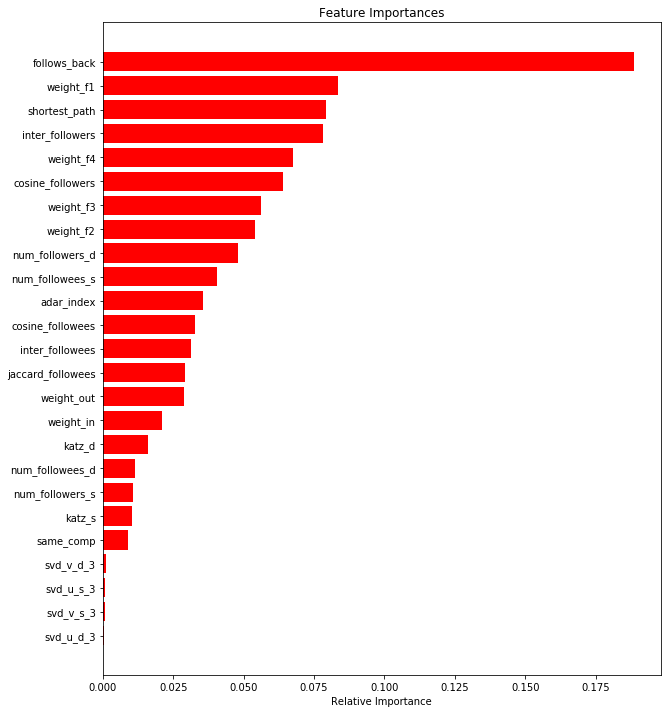

In [16]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

In [8]:
# reading data 
if os.path.isfile('data/after_eda/train_pos_after_eda.csv'):
    train_graph=nx.read_edgelist('data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
else:
    print("please run the FB_EDA.ipynb or download the files from drive")

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399


In [9]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

## 1. Preferential Attachment

https://en.wikipedia.org/wiki/Preferential_attachment

https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_prediction.preferential_attachment.html

\begin{equation}
Preferential  Attachment = {|X| * |Y|}
\end{equation}

In [10]:
#for followees
def pre_att_for_followees(a,b):
    try:
        return len(set(train_graph.successors(a))) * len(set(train_graph.successors(b)))
    except:
        return 0

In [11]:
#for followers
def pre_att_for_followers(a,b):
    try:
        return len(set(train_graph.predecessors(a)))* len(set(train_graph.predecessors(b)))
    except:
        return 0

### Adding new set of features
- Preferential Attachment

In [12]:
if not os.path.isfile('data/fea_sample/storage_sample_stage5.h5'):
    #mapping Preferential Attachment followers to train and test data
    df_final_train['preferential_attachment_followers'] = df_final_train.apply(lambda row:
                                            pre_att_for_followers(row['source_node'],row['destination_node']),axis=1)
    df_final_test['preferential_attachment_followers'] = df_final_test.apply(lambda row:
                                            pre_att_for_followers(row['source_node'],row['destination_node']),axis=1)

    #mapping Preferential Attachment followees to train and test data
    df_final_train['preferential_attachment_followees'] = df_final_train.apply(lambda row:
                                            pre_att_for_followees(row['source_node'],row['destination_node']),axis=1)
    df_final_test['preferential_attachment_followees'] = df_final_test.apply(lambda row:
                                            pre_att_for_followees(row['source_node'],row['destination_node']),axis=1)
    
    hdf = HDFStore('data/fea_sample/storage_sample_stage5.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('data/fea_sample/storage_sample_stage5.h5', 'train_df',mode='r')
    df_final_test = read_hdf('data/fea_sample/storage_sample_stage5.h5', 'test_df',mode='r')    

## 2.  SVD Feature
#### Calculate svd_mul as multiply between Sourse node SVD and Destination node SVD features 

$ M = U \sum V^* $

So, given matrix __M:n×m__ that performs some linear transformation, the SVD decomposes that transformation into three steps: __U:m×m__, __S:m×n__, __V:n×n__, such that __M=U×S×V^T__

In [13]:
def svd(x, S):
    try:
        z = sadj_dict[x]
        return S[z]
    except:
        return [0,0,0,0,0,0]

In [14]:
#for svd features to get feature vector creating a dict node val and inedx in svd vector
sadj_col = sorted(train_graph.nodes())
sadj_dict = { val:idx for idx,val in enumerate(sadj_col)}

In [15]:
Adj = nx.adjacency_matrix(train_graph,nodelist=sorted(train_graph.nodes())).asfptype()

In [16]:
U, s, V = svds(Adj, k = 6)
print('Adjacency matrix Shape',Adj.shape)
print('U Shape',U.shape)
print('V Shape',V.shape)
print('s Shape',s.shape)

Adjacency matrix Shape (1780722, 1780722)
U Shape (1780722, 6)
V Shape (6, 1780722)
s Shape (6,)


In [17]:
# for U shape
train_source_svd_U = df_final_train.source_node.apply(lambda x: svd(x, U))
train_destination_svd_U = df_final_train.destination_node.apply(lambda x: svd(x, U))
test_source_svd_U = df_final_test.source_node.apply(lambda x: svd(x, U))
test_destination_svd_U = df_final_test.destination_node.apply(lambda x: svd(x, U))

In [18]:
## convert list to array FOR U SHAPE
train_source_svd_U = np.array([np.array(i) for i in train_source_svd_U])
train_destination_svd_U = np.array([np.array(i) for i in train_destination_svd_U])
test_source_svd_U = np.array([np.array(i) for i in test_source_svd_U])
test_destination_svd_U = np.array([np.array(i) for i in test_destination_svd_U])

In [19]:
# for V shape
train_source_svd_V = df_final_train.source_node.apply(lambda x: svd(x, V.T))
train_destination_svd_V = df_final_train.destination_node.apply(lambda x: svd(x, V.T))
test_source_svd_V = df_final_test.source_node.apply(lambda x: svd(x, V.T))
test_destination_svd_V = df_final_test.destination_node.apply(lambda x: svd(x, V.T))

In [20]:
## convert list to array FOR V SHAPE 
train_source_svd_V = np.array([np.array(i) for i in train_source_svd_V])
train_destination_svd_V = np.array([np.array(i) for i in train_destination_svd_V])
test_source_svd_V = np.array([np.array(i) for i in test_source_svd_V])
test_destination_svd_V = np.array([np.array(i) for i in test_destination_svd_V])

In [21]:
print(train_source_svd_U.shape)
print(test_source_svd_U.shape)

(100002, 6)
(50002, 6)


In [22]:
print(train_source_svd_V.shape)
print(test_source_svd_V.shape)

(100002, 6)
(50002, 6)


In [23]:
# Multuply between Sourse node SVD and Destination node SVD features
train_sour_dist_svd_U = np.multiply(train_source_svd_U,train_destination_svd_U)
test_sour_dist_svd_U = np.multiply(test_source_svd_U,test_destination_svd_U)

In [24]:
print(train_sour_dist_svd_U.shape)
print(test_sour_dist_svd_U.shape)

(100002, 6)
(50002, 6)


In [25]:
# Multiply between Sourse node SVD and Destination node SVD features for V shape
train_sour_dist_svd_V = np.multiply(train_source_svd_V,train_destination_svd_V)
test_sour_dist_svd_V = np.multiply(test_source_svd_V,test_destination_svd_V)

In [26]:
print(train_sour_dist_svd_V.shape)
print(test_sour_dist_svd_V.shape)

(100002, 6)
(50002, 6)


In [27]:
train_sour_dist_svd_U = pd.DataFrame(train_sour_dist_svd_U,columns=['svd_mul_u_1', 'svd_mul_u_2','svd_mul_u_3', 'svd_mul_u_4', 'svd_mul_u_5', 'svd_mul_u_6'])
train_sour_dist_svd_U.head(2)

,svd_mul_u_1,svd_mul_u_2,svd_mul_u_3,svd_mul_u_4,svd_mul_u_5,svd_mul_u_6
0,3.395996e-24,2.490499e-25,1.114951e-11,7.963288e-25,5.587265e-25,1.283841e-23
1,9.445523e-34,4.270411e-34,4.508973e-33,4.723024e-24,3.336427e-31,1.091166e-17


In [28]:
test_sour_dist_svd_U = pd.DataFrame(test_sour_dist_svd_U,columns=['svd_mul_u_1', 'svd_mul_u_2','svd_mul_u_3', 'svd_mul_u_4', 'svd_mul_u_5', 'svd_mul_u_6'])
test_sour_dist_svd_U.head(2)

,svd_mul_u_1,svd_mul_u_2,svd_mul_u_3,svd_mul_u_4,svd_mul_u_5,svd_mul_u_6
0,1.024953e-22,1.214161e-25,8.413963e-20,7.155031e-26,9.437431e-24,1.926952e-29
1,8.108974e-25,4.879907e-25,1.424150e-22,4.129171e-26,2.419778e-23,9.266452e-30


In [29]:
train_sour_dist_svd_V = pd.DataFrame(train_sour_dist_svd_V,columns=['svd_mul_v_1', 'svd_mul_v_2','svd_mul_v_3', 'svd_mul_v_4', 'svd_mul_v_5', 'svd_mul_v_6'])
train_sour_dist_svd_V.head(2)

,svd_mul_v_1,svd_mul_v_2,svd_mul_v_3,svd_mul_v_4,svd_mul_v_5,svd_mul_v_6
0,9.780548e-25,1.835653e-25,2.238777e-12,1.022342e-26,7.922820e-25,7.153990e-28
1,1.721567e-33,6.706284e-34,9.893972e-33,9.719822e-24,6.670707e-31,2.250992e-17


In [30]:
test_sour_dist_svd_V = pd.DataFrame(test_sour_dist_svd_V,columns=['svd_mul_v_1', 'svd_mul_v_2','svd_mul_v_3', 'svd_mul_v_4', 'svd_mul_v_5', 'svd_mul_v_6'])
test_sour_dist_svd_V.head(2)

,svd_mul_v_1,svd_mul_v_2,svd_mul_v_3,svd_mul_v_4,svd_mul_v_5,svd_mul_v_6
0,2.147580e-22,1.090767e-22,2.073977e-17,6.717807e-21,1.203126e-21,9.563661e-26
1,2.570858e-24,1.650558e-24,2.248463e-22,7.300547e-26,6.389662e-24,5.057017e-30


#### Calculate svd_dot as multiply between Sourse node SVD and Destination node SVD features

In [31]:
train_sour_dist_svd_U['sour_dist_svd_dot_U'] = train_sour_dist_svd_U.sum(axis=1)
train_sour_dist_svd_V['sour_dist_svd_dot_V'] = train_sour_dist_svd_V.sum(axis=1)
train_sour_dist_svd_U.head(2)

,svd_mul_u_1,svd_mul_u_2,svd_mul_u_3,svd_mul_u_4,svd_mul_u_5,svd_mul_u_6,sour_dist_svd_dot_U
0,3.395996e-24,2.490499e-25,1.114951e-11,7.963288e-25,5.587265e-25,1.283841e-23,1.114951e-11
1,9.445523e-34,4.270411e-34,4.508973e-33,4.723024e-24,3.336427e-31,1.091166e-17,1.091166e-17


In [32]:
train_sour_dist_svd_V.head(2)

,svd_mul_v_1,svd_mul_v_2,svd_mul_v_3,svd_mul_v_4,svd_mul_v_5,svd_mul_v_6,sour_dist_svd_dot_V
0,9.780548e-25,1.835653e-25,2.238777e-12,1.022342e-26,7.922820e-25,7.153990e-28,2.238777e-12
1,1.721567e-33,6.706284e-34,9.893972e-33,9.719822e-24,6.670707e-31,2.250992e-17,2.250993e-17


In [33]:
test_sour_dist_svd_U['sour_dist_svd_dot_U'] = test_sour_dist_svd_U.sum(axis=1)
test_sour_dist_svd_V['sour_dist_svd_dot_V'] = test_sour_dist_svd_V.sum(axis=1)
test_sour_dist_svd_U.head(2)

,svd_mul_u_1,svd_mul_u_2,svd_mul_u_3,svd_mul_u_4,svd_mul_u_5,svd_mul_u_6,sour_dist_svd_dot_U
0,1.024953e-22,1.214161e-25,8.413963e-20,7.155031e-26,9.437431e-24,1.926952e-29,8.425175e-20
1,8.108974e-25,4.879907e-25,1.424150e-22,4.129171e-26,2.419778e-23,9.266452e-30,1.679530e-22


In [34]:
test_sour_dist_svd_V.head(2)

,svd_mul_v_1,svd_mul_v_2,svd_mul_v_3,svd_mul_v_4,svd_mul_v_5,svd_mul_v_6,sour_dist_svd_dot_V
0,2.147580e-22,1.090767e-22,2.073977e-17,6.717807e-21,1.203126e-21,9.563661e-26,2.074802e-17
1,2.570858e-24,1.650558e-24,2.248463e-22,7.300547e-26,6.389662e-24,5.057017e-30,2.355304e-22


### Adding new set of features

In [35]:
df_final_train = pd.concat([df_final_train,train_sour_dist_svd_U], axis=1)
df_final_train = pd.concat([df_final_train,train_sour_dist_svd_V], axis=1)
df_final_train.head(5)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_mul_u_5,svd_mul_u_6,sour_dist_svd_dot_U,svd_mul_v_1,svd_mul_v_2,svd_mul_v_3,svd_mul_v_4,svd_mul_v_5,svd_mul_v_6,sour_dist_svd_dot_V
0,273084,1505602,1,0.000000,0.000000,0.000000,0.000000,11,6,15,...,5.587265e-25,1.283841e-23,1.114951e-11,9.780548e-25,1.835653e-25,2.238777e-12,1.022342e-26,7.922820e-25,7.153990e-28,2.238777e-12
1,1070610,1194809,1,0.478261,0.083333,0.657376,0.253546,14,20,35,...,3.336427e-31,1.091166e-17,1.091166e-17,1.721567e-33,6.706284e-34,9.893972e-33,9.719822e-24,6.670707e-31,2.250992e-17,2.250993e-17
2,299485,1338688,1,0.000000,0.000000,0.000000,0.000000,7,1,9,...,-6.301645e-32,6.556321e-35,-8.066712e-32,6.198801e-34,8.001580e-32,1.539390e-30,6.248021e-31,1.836809e-30,1.887255e-36,4.081638e-30
3,387414,1708319,1,0.000000,0.000000,0.000000,0.000000,10,1,16,...,1.190295e-30,-5.637058e-34,4.042934e-29,9.654720e-26,3.418601e-24,8.065218e-24,8.951815e-24,2.408065e-25,3.912229e-31,2.077299e-23
4,568515,183503,1,0.126126,0.131944,0.305505,0.258989,20,105,117,...,1.442098e-28,1.270275e-16,1.272300e-16,4.193625e-30,3.681151e-30,5.042917e-29,2.725896e-19,7.102719e-29,1.355876e-16,1.358602e-16


In [36]:
df_final_test = pd.concat([df_final_test,test_sour_dist_svd_U], axis=1)
df_final_test = pd.concat([df_final_test,test_sour_dist_svd_V], axis=1)
df_final_test.head(5)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_mul_u_5,svd_mul_u_6,sour_dist_svd_dot_U,svd_mul_v_1,svd_mul_v_2,svd_mul_v_3,svd_mul_v_4,svd_mul_v_5,svd_mul_v_6,sour_dist_svd_dot_V
0,848424,784690,1,0.052632,0.000000,0.109109,0.000000,6,14,6,...,9.437431e-24,1.926952e-29,8.425175e-20,2.147580e-22,1.090767e-22,2.073977e-17,6.717807e-21,1.203126e-21,9.563661e-26,2.074802e-17
1,1282653,659527,1,0.000000,0.000000,0.000000,0.000000,2,5,1,...,2.419778e-23,9.266452e-30,1.679530e-22,2.570858e-24,1.650558e-24,2.248463e-22,7.300547e-26,6.389662e-24,5.057017e-30,2.355304e-22
2,1199100,991335,1,0.000000,0.000000,0.000000,0.000000,17,1,16,...,1.375791e-22,3.922628e-25,8.667626e-11,3.194986e-24,6.044741e-25,6.547692e-12,8.252135e-26,1.587976e-24,2.199484e-26,6.547692e-12
3,1663641,58705,1,0.062500,0.117647,0.125739,0.218218,11,23,14,...,3.998241e-21,2.224534e-22,4.059283e-09,1.883950e-23,2.960936e-22,3.689788e-21,1.478217e-08,2.222510e-21,9.869237e-22,1.478217e-08
4,578054,146673,1,0.041667,0.038462,0.093659,0.081111,19,6,19,...,1.047481e-21,4.419404e-31,2.608997e-21,2.828938e-29,1.210826e-23,4.523007e-24,9.379109e-29,1.281265e-24,1.191966e-30,1.791265e-23


In [37]:
import tables
hdf = HDFStore('data/fea_sample/storage_sample_stage6.h5')
hdf.put('train_df',df_final_train, format='table', data_columns=True)
hdf.put('test_df',df_final_test, format='table', data_columns=True)
hdf.close()

In [38]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferential_attachment_followers',
       'preferential_attachment_followees', 'svd_mul_u_1', 's

In [39]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

## 3. Modelling
### 3.1 Random Forest 

In [91]:
# Random Forest model after add all features
param_dist = {"n_estimators":sp_randint(105,300),
              "max_depth": sp_randint(10,20),
              "min_samples_split": sp_randint(100,200),
              "min_samples_leaf": sp_randint(25,70)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96149445 0.96137995 0.96179109 0.96242706 0.96074301]
mean train scores [0.96254083 0.9626828  0.96316492 0.96386263 0.96168923]


In [92]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=101,
            min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [102]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=101,
            min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9641477877451725
Test f1 score 0.9269506537326022


Train confusion_matrix


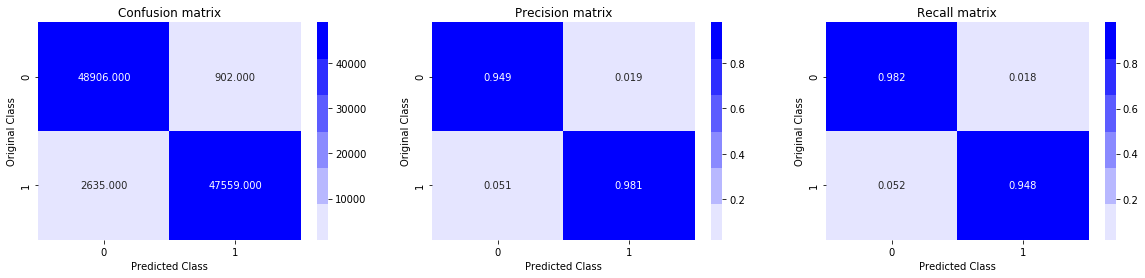

Test confusion_matrix


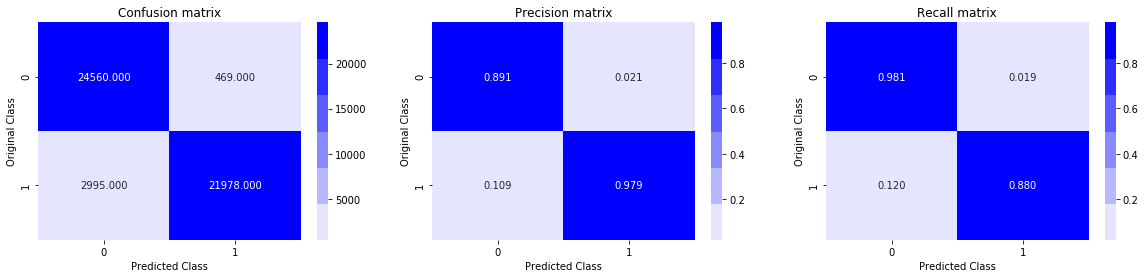

In [103]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

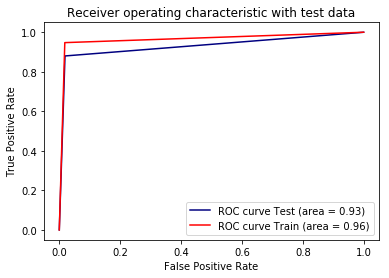

In [104]:
from sklearn.metrics import roc_curve, auc
fpr_tr,tpr_tr,ths = roc_curve(y_train,y_train_pred)
fpr_te,tpr_te,ths = roc_curve(y_test,y_test_pred)
auc_sc_tr = auc(fpr_tr, tpr_tr)
auc_sc_te = auc(fpr_te, tpr_te)
plt.plot(fpr_te, tpr_te, color='navy',label='ROC curve Test (area = %0.2f)' % auc_sc_te)
plt.plot(fpr_tr, tpr_tr, color='r', label='ROC curve Train (area = %0.2f)' % auc_sc_tr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

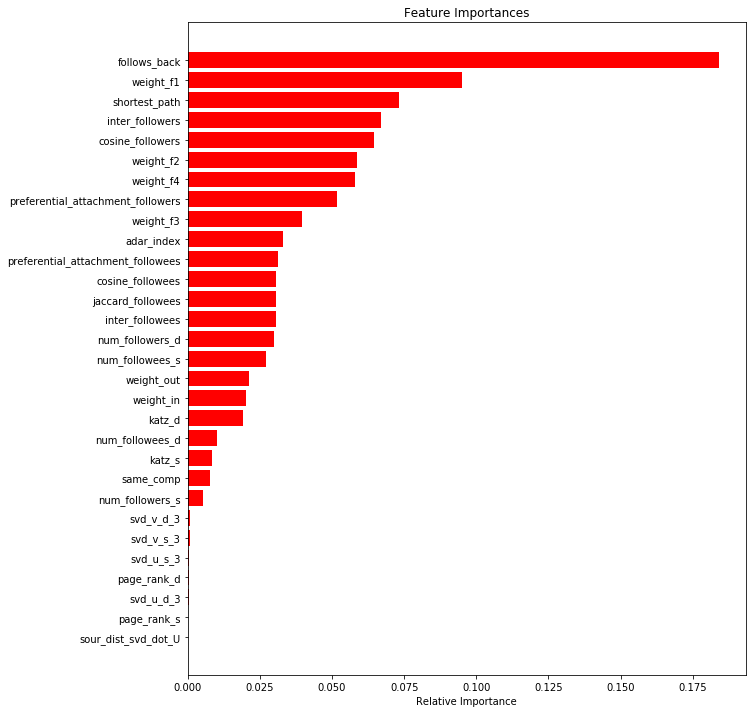

In [105]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 3.2 XGBoost

In [100]:
import xgboost as xgb

x_model = xgb.XGBClassifier(nthread=4)
param_dist = {"learning_rate" : uniform(0.001,0.3),
              "n_estimators" : sp_randint(10,600),
              "max_depth"    : sp_randint(5,20),
              "min_child_weight": sp_randint(1,10),
              "gamma"        : uniform(0,0.03),
              "subsample"    : uniform(0.6,0.4),
              "reg_alpha"    : sp_randint(0,200),
              "reg_lambda"   : sp_randint(0,200),
              "colsample_bytree":uniform(0.6,0.3)}

rf_random = RandomizedSearchCV(x_model, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)
rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.97414933 0.97633273 0.97537993 0.97511112 0.9790474 ]
mean train scores [0.97543903 0.97857296 0.97711984 0.9759107  0.98539901]


In [101]:
print(rf_random.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8400362967290745, gamma=0.004483331345083044,
       learning_rate=0.07020278445544602, max_delta_step=0, max_depth=11,
       min_child_weight=1, missing=None, n_estimators=277, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0, reg_alpha=2,
       reg_lambda=171, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8103275853858888)


In [107]:
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                   colsample_bytree=0.8400362967290745, gamma=0.004483331345083044,
                   learning_rate=0.07020278445544602, max_delta_step=0, max_depth=11,
                   min_child_weight=1, missing=None, n_estimators=277, n_jobs=1,
                   nthread=4, objective='binary:logistic', random_state=0, reg_alpha=2,
                   reg_lambda=171, scale_pos_weight=1, seed=None, silent=True,
                   subsample=0.8103275853858888)

clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.98522730691699
Test f1 score 0.9328859060402683


Train confusion_matrix


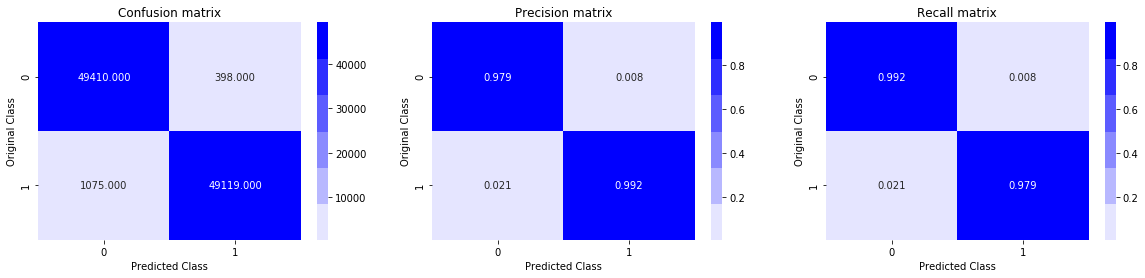

Test confusion_matrix


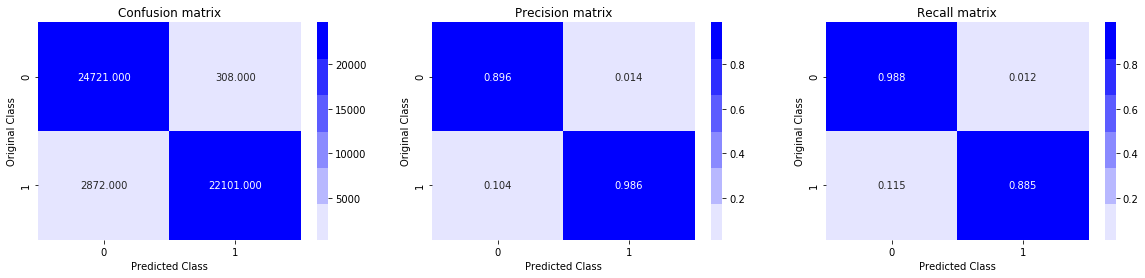

In [108]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

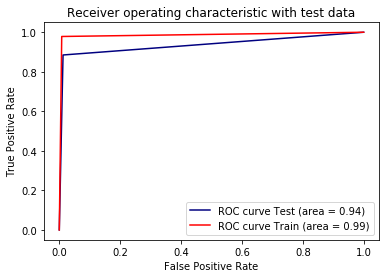

In [109]:
from sklearn.metrics import roc_curve, auc
fpr_tr,tpr_tr,ths = roc_curve(y_train,y_train_pred)
fpr_te,tpr_te,ths = roc_curve(y_test,y_test_pred)
auc_sc_tr = auc(fpr_tr, tpr_tr)
auc_sc_te = auc(fpr_te, tpr_te)
plt.plot(fpr_te, tpr_te, color='navy',label='ROC curve Test (area = %0.2f)' % auc_sc_te)
plt.plot(fpr_tr, tpr_tr, color='r', label='ROC curve Train (area = %0.2f)' % auc_sc_tr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

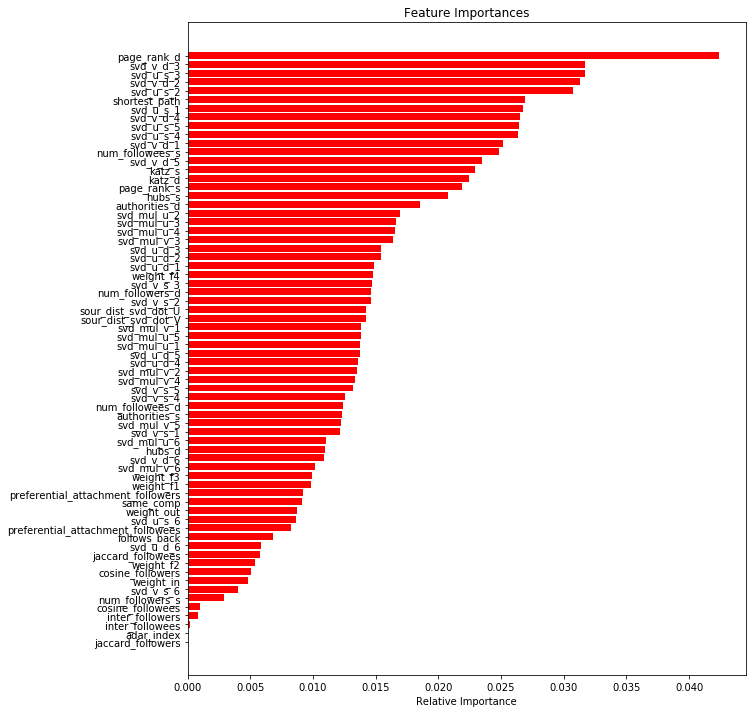

In [114]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-81:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [111]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","Best Hyper Parameter","Train f1_score","Test f1_score","Train AUC","Test_AUC"]
x.add_row(["RandomForestClassifier","max_depth:14, min_samples_leaf:30,\n min_samples_split:101, n_estimators:272",0.9641 ,0.9269,0.96,0.93])
x.add_row(["XGBClassifier","colsample_bytree:0.8400,gamma:0.0044,\nlearning_rate:0.0702,max_depth:11,\nmin_child_weight:1,n_estimators: 77,\nreg_alpha:2,reg_lambda:171,\nsubsample:0.8103",0.9852,0.9328,0.99,0.94])
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
printmd('****Final Conclusion:****')
print(x)

****Final Conclusion:****

+------------------------+------------------------------------------+----------------+---------------+-----------+----------+
|         Model          |           Best Hyper Parameter           | Train f1_score | Test f1_score | Train AUC | Test_AUC |
+------------------------+------------------------------------------+----------------+---------------+-----------+----------+
| RandomForestClassifier |    max_depth:14, min_samples_leaf:30,    |     0.9641     |     0.9269    |    0.96   |   0.93   |
|                        |  min_samples_split:101, n_estimators:272 |                |               |           |          |
|     XGBClassifier      |  colsample_bytree:0.8400,gamma:0.0044,   |     0.9852     |     0.9328    |    0.99   |   0.94   |
|                        |    learning_rate:0.0702,max_depth:11,    |                |               |           |          |
|                        |   min_child_weight:1,n_estimators: 77,   |                |               |           |    